# Top 10 Busiest Airports
### **Task 9**: Find the top 10 busiest airports. 
* Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? 
* How much traffic do these 10 airports cover?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import scipy.stats as st

In [3]:
df_flights_cleaned = pd.read_csv('flights_cleaned.csv', index_col=False)
df_flights_cleaned.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",1100,1138.0,...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303.0,...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159.0,...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833.0,...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353.0,...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0


In [226]:
df_flights_cleaned.columns

Index(['fl_date', 'fl_year', 'fl_month', 'mkt_unique_carrier',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [75]:
# convert datetype dtype
df_flights_cleaned['fl_date'] = pd.to_datetime(df_flights_cleaned['fl_date'], format='%Y-%m-%d', errors='ignore')

# create new column 'fl_year' and fl_month
# extract year 
df_flights_cleaned['fl_year'] = df_flights_cleaned['fl_date'].dt.year
df_flights_cleaned['fl_month'] = df_flights_cleaned['fl_date'].dt.month

# shift column position 
fl_year = df_flights_cleaned.pop('fl_year')
fl_month = df_flights_cleaned.pop('fl_month')

#insert col using insert 
df_flights_cleaned.insert(1, 'fl_month', fl_month)
df_flights_cleaned.insert(1, 'fl_year', fl_year)

df_flights_cleaned.head()

,fl_date,fl_year,fl_month,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,2018,5,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,2019,4,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,2019,2,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,2018,11,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,2018,8,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0


## Top 10 Busiest Flights in Origin and Destination Airports for 2018 and 2019 

In [204]:
# df top 10 busiest flights for 2018 and 2019 cumulative
df_flight_cnt_orig = df_flights_cleaned.groupby(['origin']).size().reset_index(name='orig_flight_cnt')
df_flight_cnt_orig.sort_values(by='orig_flight_cnt', ascending=False, inplace=True)

df_flight_cnt_dest = df_flights_cleaned.groupby(['dest']).size().reset_index(name='dest_flight_cnt')
df_flight_cnt_dest.sort_values(by='dest_flight_cnt', ascending=False, inplace=True)

df_flight_cnt = df_flight_cnt_orig.merge(df_flight_cnt_dest, how='left', left_on='origin', right_on='dest')

df_flight_orig_top10 = df_flight_cnt.sort_values(by='orig_flight_cnt', ascending=False)[:10]
df_flight_dest_top10 = df_flight_cnt.sort_values(by='dest_flight_cnt', ascending=False)[:10]

print("top 10 origin airports with the most flight counts")
display(df_flight_orig_top10)
print("top 10 destination airports with the most flight counts")
display(df_flight_dest_top10)

# df_busiest_flights = df_flights_cleaned[['origin', 'dest', 'fl_year']]
# df_busiest_flights = df_busiest_flights.groupby(['origin', 'dest', 'fl_year']).sum().reset_index() 
# df_busiest_flights = df_busiest_flights.merge(df_flight_count, how='left', on=['origin', 'fl_year'])
# df_busiest_flights.sort_values(by='flight_count', ascending=False)[:10]

top 10 origin airports with the most flight counts


,origin,orig_flight_cnt,dest,dest_flight_cnt
0,ATL,10019,ATL,9770.0
1,ORD,9506,ORD,9465.0
2,DFW,7105,DFW,7085.0
3,DEN,6871,DEN,6821.0
4,LAX,6264,LAX,6334.0
5,CLT,6247,CLT,6219.0
6,SEA,4821,SEA,4856.0
7,PHX,4479,PHX,4372.0
8,SFO,4425,SFO,4299.0
9,IAH,4352,IAH,4538.0


top 10 destination airports with the most flight counts


,origin,orig_flight_cnt,dest,dest_flight_cnt
0,ATL,10019,ATL,9770.0
1,ORD,9506,ORD,9465.0
2,DFW,7105,DFW,7085.0
3,DEN,6871,DEN,6821.0
4,LAX,6264,LAX,6334.0
5,CLT,6247,CLT,6219.0
6,SEA,4821,SEA,4856.0
9,IAH,4352,IAH,4538.0
7,PHX,4479,PHX,4372.0
8,SFO,4425,SFO,4299.0


In [205]:
# # df top 10 busiest flights cumlative for 2018 and 2019 -- carriers with the most flight count in desc order by default with value_counts
# df_busiest_flights = pd.DataFrame(df_flights_cleaned['origin'].value_counts().reset_index(name='flight_count')[:10])
# df_busiest_flights

In [206]:
# Import passengers df
df_pass = pd.read_csv('passengers.csv')
df_pass.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,17,37400,136,43,4,0,57,423,321,...,US,United States,1,194,1,2016,8,1,F,DU
1,62,93,4140480,16833,15507,144102,0,1721,21916,19424,...,US,United States,6,634,1,2015,5,4,F,DU
2,27,20,244800,1000,752,0,0,198,1219,817,...,US,United States,6,629,1,2015,12,1,F,DU
3,0,1,33630,126,120,0,0,825,156,126,...,US,United States,6,612,1,2015,1,2,L,DU
4,0,1,75830,179,145,0,0,483,77,67,...,US,United States,6,617,1,2017,3,1,L,DU


In [101]:
df_pass.shape

(200000, 38)

In [102]:
df_pass.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [112]:
df_pass['year'].unique

<bound method Series.unique of 0         2016
1         2015
2         2015
3         2015
4         2017
          ... 
199995    2019
199996    2015
199997    2016
199998    2019
199999    2018
Name: year, Length: 200000, dtype: int64>

In [143]:
# df for passenger count for each airport at origin for all years (2015 to 2018)
df_pass_orig = df_pass['origin'].value_counts().rename_axis('origin').reset_index(name='pass_count')
df_pass_orig.head(10)

,origin,pass_count
0,ORD,6699
1,ATL,5596
2,DEN,4921
3,LAX,4388
4,IAH,3954
5,DTW,3824
6,MSP,3778
7,DFW,3756
8,MIA,3563
9,EWR,3517


filter number of passengers for years 2018 and 2019 ONLY:

In [117]:
# filter number of passengers for 2018 and 2019 only
df_pass_year = df_pass.loc[(df_pass['year'] >= 2018)]

# df_pass_year['year'].value_counts()
df_pass_year

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
5,0,1,49090,180,0,0,0,599,96,77,...,US,United States,6,888,1,2019,3,2,L,DU
12,24,24,974180,3840,3590,643,33106,1517,4764,4321,...,US,United States,6,614,1,2019,3,4,F,DU
15,0,1,2801,14,7,0,0,5428,0,0,...,GB,United Kingdom,6,788,1,2018,2,11,L,IF
18,4,4,173600,700,419,0,0,407,345,250,...,US,United States,6,838,1,2018,7,1,F,DU
19,41,41,1189000,5945,3729,0,0,1185,7479,6222,...,US,United States,6,698,1,2018,2,3,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,8,8,249600,1248,1161,0,0,519,810,618,...,US,United States,6,698,1,2019,7,2,F,DU
199994,27,26,1013056,4103,3294,1179,0,489,2410,1910,...,US,United States,6,694,1,2018,7,1,F,DU
199995,351,323,11175800,46189,36187,14230,0,325,23236,16975,...,US,United States,6,612,1,2019,5,1,F,DU
199998,0,15,16500,102,42,3,0,67,637,562,...,US,United States,0,26,1,2019,4,1,F,DU


In [148]:
# df for passenger count for each airport at origin for 2018 and 2019
df_pass_orig_cumyr = df_pass_year['origin'].value_counts().rename_axis('origin').reset_index(name='pass_count')
print("passenger count for origin airports for 2018 and 2019:")
display(df_pass_orig_cumyr.head(10))

df_pass_dest_cumyr = df_pass_year['dest'].value_counts().rename_axis('dest').reset_index(name='pass_count')
print("passenger count for destination airports for 2018 and 2019:")
display(df_pass_dest_cumyr.head(10))

passenger count for origin airports for 2018 and 2019:


,origin,pass_count
0,ORD,2851
1,DEN,2085
2,ATL,1986
3,LAX,1834
4,IAH,1639
5,DFW,1558
6,EWR,1480
7,MIA,1438
8,DTW,1370
9,MSP,1330


passenger count for destination airports for 2018 and 2019:


,dest,pass_count
0,ORD,2876
1,DEN,2200
2,ATL,1862
3,LAX,1767
4,IAH,1634
5,DFW,1595
6,EWR,1446
7,MSP,1373
8,MIA,1329
9,JFK,1318


In [207]:
print("top 10 busiest origin airports with passenger count")
df_orig_pass_top10 = df_flight_cnt_orig.merge(df_pass_orig_cumyr, how='left', on='origin')[:10]
display(df_orig_pass_top10)

print("top 10 busiest destination airports with passenger count")
df_dest_pass_top10 = df_flight_cnt_dest.merge(df_pass_dest_cumyr, how='left', on='dest')[:10]
display(df_dest_pass_top10)

# print("top 10 destination airports")
# display(df_flight_dest_top10)

top 10 busiest origin airports with passenger count


,origin,orig_flight_cnt,pass_count
0,ATL,10019,1986.0
1,ORD,9506,2851.0
2,DFW,7105,1558.0
3,DEN,6871,2085.0
4,LAX,6264,1834.0
5,CLT,6247,1176.0
6,SEA,4821,1104.0
7,PHX,4479,1075.0
8,SFO,4425,1200.0
9,IAH,4352,1639.0


top 10 busiest destination airports with passenger count


,dest,dest_flight_cnt,pass_count
0,ATL,9770,1862.0
1,ORD,9465,2876.0
2,DFW,7085,1595.0
3,DEN,6821,2200.0
4,LAX,6334,1767.0
5,CLT,6219,1257.0
6,SEA,4856,1104.0
7,IAH,4538,1634.0
8,PHX,4372,1047.0
9,SFO,4299,1228.0


In [158]:
# # df top 10 busiest flights per 2018, and per 2019

# df_pass_cnt_orig_yr = df_pass_year.groupby(['origin', 'year']).size().reset_index(name='pass_count')
# df_pass_cnt_orig_yr.sort_values(by='pass_count', ascending=False)[:10]

# # df_busiest_flights = df_flights_cleaned[['fl_year', 'origin']]
# # df_busiest_flights = df_busiest_flights.groupby(['fl_year', 'origin']).sum().reset_index() 
# # df_busiest_flights = df_busiest_flights.merge(df_flight_count, how='left', on=['origin', 'fl_year'])
# # df_busiest_flights.sort_values(by='flight_count', ascending=False)[:10]

In [126]:
# comparing value_counts and groupby results for fun
# # df for passenger count for each airport at origin for 2018 and 2019 only

# # df_pass_orig = passengers[['origin_airport_id', 'passengers', 'origin']]

# df_pass_orig2 = df_pass.groupby(['origin']).count().reset_index()
# df_pass_orig2.sort_values(by='passengers', ascending=False)

In [127]:
# df_pass2 = df_pass.groupby(['unique_carrier']).sum().reset_index() 
# df_pass2

## Plot

In [200]:
display(df_orig_pass_top10)
display(df_dest_pass_top10)

,origin,orig_flight_cnt,pass_count
0,ATL,10019,1986.0
1,ORD,9506,2851.0
2,DFW,7105,1558.0
3,DEN,6871,2085.0
4,LAX,6264,1834.0
5,CLT,6247,1176.0
6,SEA,4821,1104.0
7,PHX,4479,1075.0
8,SFO,4425,1200.0
9,IAH,4352,1639.0


,dest,dest_flight_cnt,pass_count
0,ATL,9770,1862.0
1,ORD,9465,2876.0
2,DFW,7085,1595.0
3,DEN,6821,2200.0
4,LAX,6334,1767.0
5,CLT,6219,1257.0
6,SEA,4856,1104.0
7,IAH,4538,1634.0
8,PHX,4372,1047.0
9,SFO,4299,1228.0


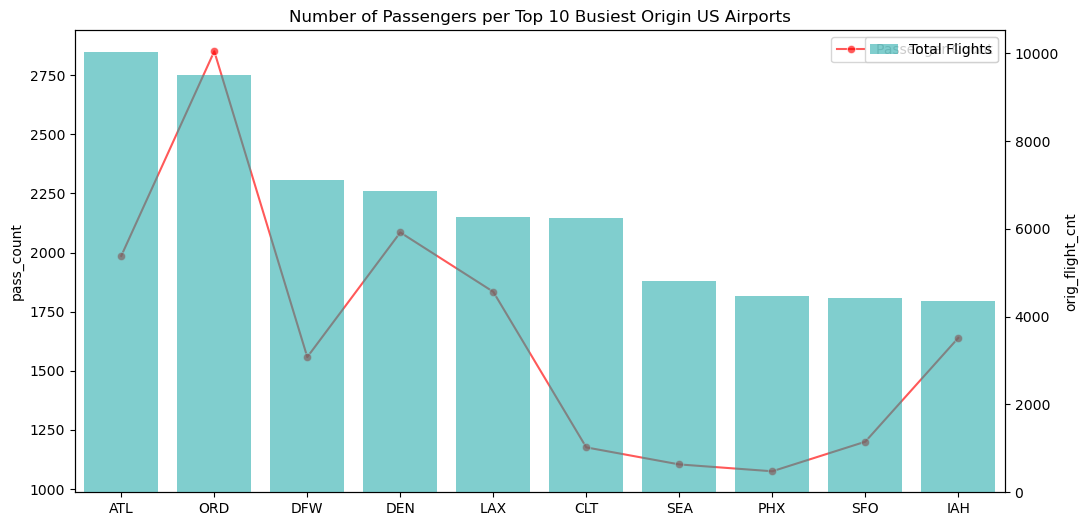

In [211]:
# Plot number of passengers vs. top 10 busiest ORIGIN airport

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_orig_pass_top10['pass_count'], marker='o', sort = False, color = 'r', ax=ax1, alpha=0.65, label="Passenger Count")
ax2 = ax1.twinx()

graph = sns.barplot(data = df_orig_pass_top10, x='origin', y='orig_flight_cnt', alpha=0.55, ax=ax2, color = 'c', label='Total Flights')
graph.set(xlabel = "Airports", title ='Number of Passengers per Top 10 Busiest Origin US Airports')

ax1.legend()
ax2.legend()

In general, the largest number of flights do not seem to correspond with the largest number of passengers in an airport, with the exception of ORD, DEN, LAX and IAH.

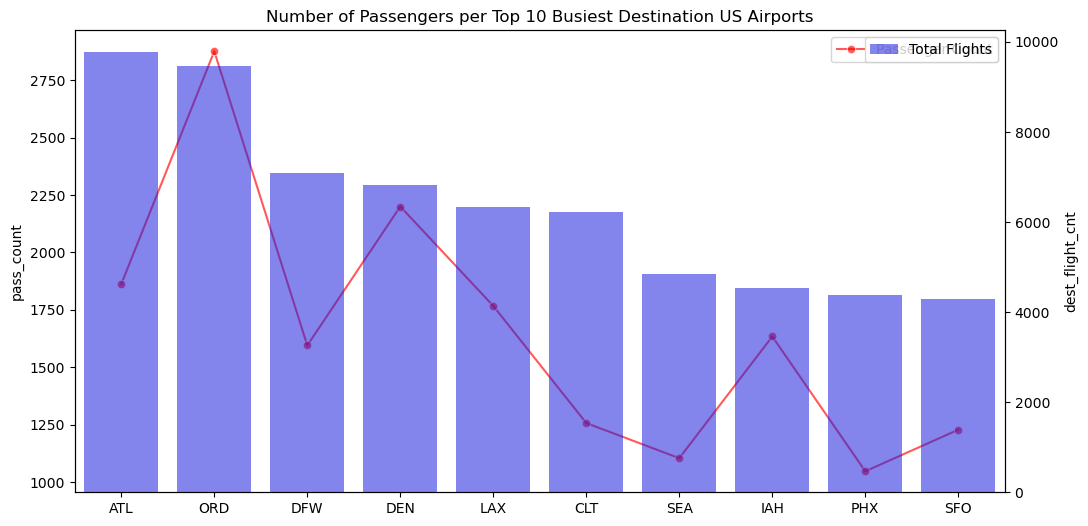

In [212]:
# Plot number of passengers vs. top 10 busiest DESTINATION airport

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_dest_pass_top10['pass_count'], marker='o', sort = False, color = 'r', ax=ax1, alpha=0.65, label="Passenger Count")
ax2 = ax1.twinx()

graph = sns.barplot(data = df_dest_pass_top10, x='dest', y='dest_flight_cnt', alpha=0.55, ax=ax2, color = 'b', label='Total Flights')
graph.set(xlabel = "Airports", title ='Number of Passengers per Top 10 Busiest Destination US Airports')

ax1.legend()
ax2.legend()

In general, the largest number of flights do not seem to correspond with the largest number of passengers in a destination airport, with the exception of ORD, DEN, and IAH.

### How much traffic do these 10 airports cover?

In [213]:
df_orig_pass_top10

,origin,orig_flight_cnt,pass_count
0,ATL,10019,1986.0
1,ORD,9506,2851.0
2,DFW,7105,1558.0
3,DEN,6871,2085.0
4,LAX,6264,1834.0
5,CLT,6247,1176.0
6,SEA,4821,1104.0
7,PHX,4479,1075.0
8,SFO,4425,1200.0
9,IAH,4352,1639.0


In [214]:
df_dest_pass_top10

,dest,dest_flight_cnt,pass_count
0,ATL,9770,1862.0
1,ORD,9465,2876.0
2,DFW,7085,1595.0
3,DEN,6821,2200.0
4,LAX,6334,1767.0
5,CLT,6219,1257.0
6,SEA,4856,1104.0
7,IAH,4538,1634.0
8,PHX,4372,1047.0
9,SFO,4299,1228.0


### Calculate the percentage of total air traffic for each of the top 10 busiest origin and destination airports  

In [234]:
df_orig_pass_top10['percent_traffic'] = df_orig_pass_top10['orig_flight_cnt'] / df_flights_cleaned['op_unique_carrier'].count()
display(df_orig_pass_top10)

df_dest_pass_top10['percent_traffic'] = df_dest_pass_top10['dest_flight_cnt'] / df_flights_cleaned['op_unique_carrier'].count()
display(df_dest_pass_top10)

,origin,orig_flight_cnt,pass_count,percent_traffic
0,ATL,10019,1986.0,0.051067
1,ORD,9506,2851.0,0.048452
2,DFW,7105,1558.0,0.036214
3,DEN,6871,2085.0,0.035022
4,LAX,6264,1834.0,0.031928
5,CLT,6247,1176.0,0.031841
6,SEA,4821,1104.0,0.024573
7,PHX,4479,1075.0,0.022830
8,SFO,4425,1200.0,0.022554
9,IAH,4352,1639.0,0.022182


,dest,dest_flight_cnt,pass_count,percent_traffic
0,ATL,9770,1862.0,0.049798
1,ORD,9465,2876.0,0.048243
2,DFW,7085,1595.0,0.036112
3,DEN,6821,2200.0,0.034767
4,LAX,6334,1767.0,0.032285
5,CLT,6219,1257.0,0.031698
6,SEA,4856,1104.0,0.024751
7,IAH,4538,1634.0,0.023130
8,PHX,4372,1047.0,0.022284
9,SFO,4299,1228.0,0.021912


In [249]:

top10_total_traffic_percent = round(df_orig_pass_top10['percent_traffic'].sum()*100 + df_dest_pass_top10['percent_traffic'].sum()*100,2)
top10_total_traffic_percent_dest = round(df_dest_pass_top10['percent_traffic'].sum()*100,2)
top10_total_traffic_percent_orig = round(df_orig_pass_top10['percent_traffic'].sum()*100,2)
print(f"The total traffic from the top 10 busiest airports in the USA between 2018-2019 is {top10_total_traffic_percent}%.")
print(f"The total traffic from the top 10 busiest ORIGIN airports in the USA between 2018-2019 is {top10_total_traffic_percent_orig}%.")
print(f"The total traffic from the top 10 busiest DESTINATION airports in the USA between 2018-2019 is {top10_total_traffic_percent_dest}%.")


The total traffic from the top 10 busiest airports in the USA between 2018-2019 is 65.16%.
The total traffic from the top 10 busiest ORIGIN airports in the USA between 2018-2019 is 32.67%.
The total traffic from the top 10 busiest DESTINATION airports in the USA between 2018-2019 is 32.5%.
